C:\Users\mindd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

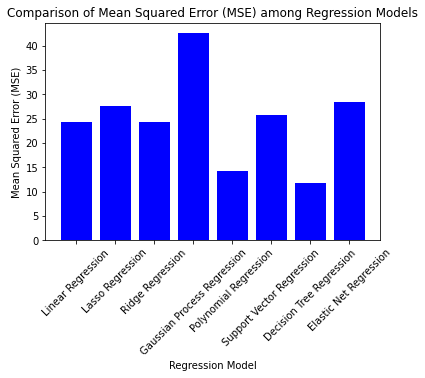

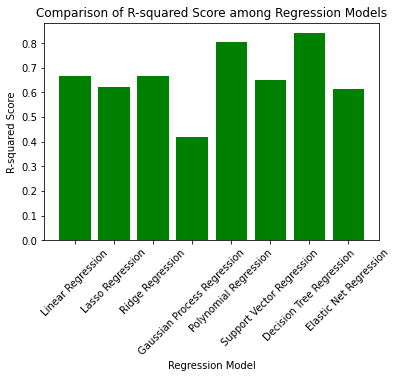

Linear Regression
Mean Squared Error (MSE): 24.291119474973527
R-squared Score: 0.6687594935356318
---------------------------
Lasso Regression
Mean Squared Error (MSE): 27.57769177613475
R-squared Score: 0.6239428734251422
---------------------------
Ridge Regression
Mean Squared Error (MSE): 24.312903830491575
R-squared Score: 0.6684624359643564
---------------------------
Gaussian Process Regression
Mean Squared Error (MSE): 42.58055297838095
R-squared Score: 0.4193596573997693
---------------------------
Polynomial Regression
Mean Squared Error (MSE): 14.176037102592927
R-squared Score: 0.806691588901105
---------------------------
Support Vector Regression
Mean Squared Error (MSE): 25.66853967839608
R-squared Score: 0.649976605976003
---------------------------
Decision Tree Regression
Mean Squared Error (MSE): 11.692647058823532
R-squared Score: 0.8405557908657055
---------------------------
Elastic Net Regression
Mean Squared Error (MSE): 28.358648122255964
R-squared Score: 0.61

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset
data = load_boston()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
linear_predictions = linear_regression.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

# Lasso Regression
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train_scaled, y_train)
lasso_predictions = lasso_regression.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Ridge Regression
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train_scaled, y_train)
ridge_predictions = ridge_regression.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Gaussian Process Regression
gaussian_process = GaussianProcessRegressor(kernel=RBF(1.0))
gaussian_process.fit(X_train_scaled, y_train)
gaussian_predictions = gaussian_process.predict(X_test_scaled)
gaussian_mse = mean_squared_error(y_test, gaussian_predictions)
gaussian_r2 = r2_score(y_test, gaussian_predictions)

# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_scaled)
X_test_poly = polynomial_features.transform(X_test_scaled)
poly_regression = LinearRegression()
poly_regression.fit(X_train_poly, y_train)
poly_predictions = poly_regression.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

# Support Vector Regression
svr_regression = SVR(kernel='rbf')
svr_regression.fit(X_train_scaled, y_train)
svr_predictions = svr_regression.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_scaled, y_train)
tree_predictions = decision_tree.predict(X_test_scaled)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
elastic_predictions = elastic_net.predict(X_test_scaled)
elastic_mse = mean_squared_error(y_test, elastic_predictions)
elastic_r2 = r2_score(y_test, elastic_predictions)

# Bar plot for MSE scores
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Gaussian Process Regression',
          'Polynomial Regression', 'Support Vector Regression', 'Decision Tree Regression', 'Elastic Net Regression']
mse_scores = [linear_mse, lasso_mse, ridge_mse, gaussian_mse, poly_mse, svr_mse, tree_mse, elastic_mse]

plt.bar(models, mse_scores, color='blue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Regression Models')
plt.xticks(rotation=45)
plt.show()

# Bar plot for R-squared scores
r2_scores = [linear_r2, lasso_r2, ridge_r2, gaussian_r2, poly_r2, svr_r2, tree_r2, elastic_r2]

plt.bar(models, r2_scores, color='green')
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Score among Regression Models')
plt.xticks(rotation=45)
plt.show()

# Print the performance metrics
for i in range(len(models)):
    print(models[i])
    print("Mean Squared Error (MSE):", mse_scores[i])
    print("R-squared Score:", r2_scores[i])
    print("---------------------------")

# Determine which model is better based on MSE
best_model = models[np.argmin(mse_scores)]
print("The best model based on Mean Squared Error (MSE) is:", best_model)
